In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\Pavan\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Pavan\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Pavan\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Pavan\An

In [3]:
# # splitting the training data into train and validation with the validation_split of 0.3

image_gen = ImageDataGenerator(rotation_range = 30,
                              width_shift_range=0.1,
                              height_shift_range =0.1,
                              rescale = 1/255,
                              shear_range =0.2,
                              zoom_range=0.2,
                              horizontal_flip=True, 
                              fill_mode = 'nearest',
                              validation_split = 0.3
                              )

In [4]:
train_data_dir ='Data for DL/Data/training'    # path for the training data in training folder 
validation_data_dir = 'Data for DL/Data/testing'     # path for validation data in testing folder

In [12]:
# generating the train data using the image_gen defined above and the the data is specified as "training" in the function.
train_gen = image_gen.flow_from_directory(
    train_data_dir,
    target_size=(150,150),
    batch_size = 16,
    subset = 'training',
    class_mode = 'categorical')

Found 4126 images belonging to 6 classes.


In [13]:
val_gen = ImageDataGenerator(rescale = 1./255)

In [14]:
#  generating the validation data using the image_gen defined above and the the data is specified as "validation" in the function.
validation_gen = image_gen.flow_from_directory(
    validation_data_dir,
    target_size=(150,150),
    batch_size = 16,
    subset = 'validation',
    class_mode = 'categorical')

Found 762 images belonging to 6 classes.


In [15]:
from keras.models import Sequential

In [16]:
from keras.layers import Activation,Dense, Dropout, Flatten,Conv2D, MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [19]:
train_gen.class_indices

{'drone': 0,
 'fighter-jet': 1,
 'helicopter': 2,
 'missile': 3,
 'passenger-plane': 4,
 'rocket': 5}

In [20]:
results= model.fit_generator(train_gen, steps_per_epoch =375, epochs=100, validation_data= validation_gen, validation_steps =130)


Epoch 1/100
375/375 [==============================] - 21653s 58s/step - loss: 1.7905 - acc: 0.2129 - val_loss: 1.7749 - val_acc: 0.2362
Epoch 2/100
375/375 [==============================] - 314s 837ms/step - loss: 1.7608 - acc: 0.2459 - val_loss: 1.6921 - val_acc: 0.2717
Epoch 3/100
375/375 [==============================] - 273s 729ms/step - loss: 1.7318 - acc: 0.2659 - val_loss: 1.6696 - val_acc: 0.3438
Epoch 4/100
375/375 [==============================] - 273s 729ms/step - loss: 1.6946 - acc: 0.3060 - val_loss: 1.6366 - val_acc: 0.3202
Epoch 5/100
375/375 [==============================] - 281s 748ms/step - loss: 1.6576 - acc: 0.3301 - val_loss: 1.5762 - val_acc: 0.3937
Epoch 6/100
375/375 [==============================] - 275s 733ms/step - loss: 1.6360 - acc: 0.3335 - val_loss: 1.5525 - val_acc: 0.4042
Epoch 7/100
375/375 [==============================] - 286s 762ms/step - loss: 1.6305 - acc: 0.3460 - val_loss: 1.5200 - val_acc: 0.4055
Epoch 8/100
375/375 [====================

In [28]:
import numpy as np

In [29]:
import matplotlib.pyplot as plt

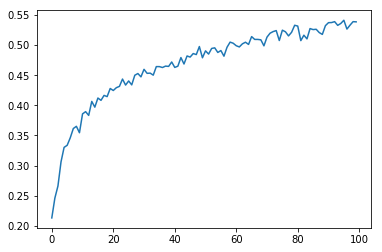

In [30]:
plt.plot(results.history['acc'])

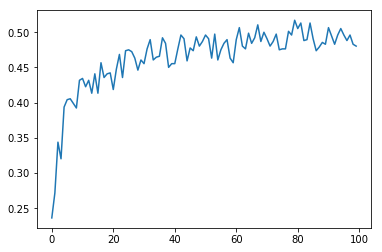

In [31]:
plt.plot(results.history['val_acc'])

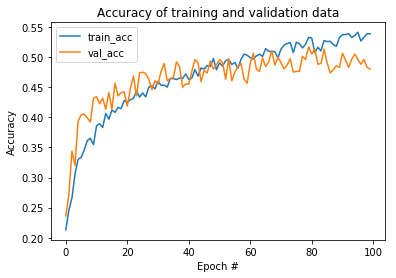

In [32]:
plt.figure()
plt.plot(np.arange(0, 100), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), results.history["val_acc"], label="val_acc")
plt.title("Accuracy of training and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

In [34]:
model.save('cvi.h5')

In [40]:
test_data_dir ='Data for DL/Data/training'

In [47]:
testing_gen = image_gen.flow_from_directory(
                        test_data_dir,
                        target_size=(150,150),
                        batch_size = 16,
                        subset = 'validation',
                        class_mode = 'categorical')


Found 1765 images belonging to 6 classes.


In [51]:
desired_batch_size=16

# used the data which is splitted using IMageDataGenerator into validation above..as i mentioned subset as 'validation'
testing_gen = image_gen.flow_from_directory(
                        test_data_dir,
                        target_size=(150,150),
                        batch_size = 16,
                        subset = 'validation',
                        shuffle=False,
                        class_mode = 'categorical')


filenames = testing_gen.filenames
nb_samples = len(filenames)
print(nb_samples)
predict = model.predict_generator(testing_gen,steps = np.ceil(nb_samples/desired_batch_size))

Found 1765 images belonging to 6 classes.
1765


In [88]:
predict[0]

array([0.37636486, 0.06032864, 0.00201241, 0.00849849, 0.5222699 ,
       0.03052575], dtype=float32)

In [53]:
def convert_to_class(y_one_hot, dtype=int):
    """ Converts a one-hot class encoding (array with as many positions as total
        classes, with 1 in the corresponding class position, 0 in the other positions),
        or soft-max class encoding (array with as many positions as total
        classes, whose largest valued position is used as class membership)
        to an integer class encoding.

        Parameters
        ----------
        y_one_hot : numpy array
            Input array with one-hot or soft-max class encoding.
        dtype : data type
            Data type to use for the output numpy array.
            (Default: int, integer data is used to represent the
            class membership).

        Return
        ----------
        Returns a numpy array with an integer class encoding.
    """

    maxi = lambda a: a.argmax()
    iter_to_na = lambda i: np.fromiter(i, dtype=dtype)
    return np.array([maxi(a) for a in y_one_hot])



In [54]:
actual = testing_gen.classes
predicted_classes = convert_to_class(predict)

In [55]:
predicted_classes

array([4, 1, 1, ..., 3, 1, 3], dtype=int64)

In [56]:
actual

array([0, 0, 0, ..., 5, 5, 5])

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:

confusion_matrix(actual, predicted_classes) 

array([[101,  71,  37,  17,  46,   1],
       [ 34, 190,  16,  32,  81,  35],
       [ 21,  26, 185,  24,  27,   1],
       [ 11,  69,  11, 111,  48,  28],
       [ 27,  47,  21,  13, 180,   8],
       [  8,  10,   7, 136,  20,  65]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report


In [63]:
print(classification_report(actual, predicted_classes))

             precision    recall  f1-score   support

          0       0.50      0.37      0.43       273
          1       0.46      0.49      0.47       388
          2       0.67      0.65      0.66       284
          3       0.33      0.40      0.36       278
          4       0.45      0.61      0.52       296
          5       0.47      0.26      0.34       246

avg / total       0.48      0.47      0.47      1765



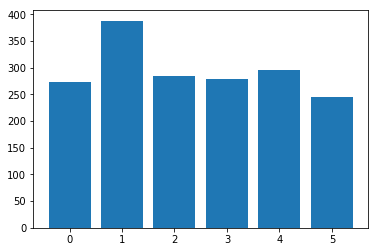

In [64]:
labels, counts = np.unique(actual, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

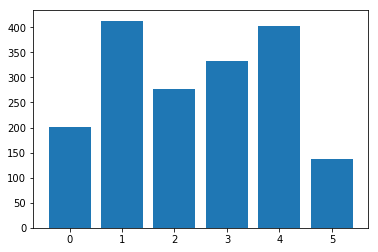

In [65]:
labels, counts = np.unique( predicted_classes, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [96]:
predict[5].argmax()

0

In [95]:
predict[5]

array([0.50411916, 0.44162214, 0.00443535, 0.00562858, 0.01267183,
       0.03152293], dtype=float32)